plt.imshow()
作用： 这是显示图像的核心函数。它接收一个图像数组（例如 NumPy 数组）作为输入，并在 Matplotlib 的坐标系中将它渲染成一个图像。

参数：

X：要显示的图像数据。对于彩色图像，通常是一个形状为 (M, N, 3) 或 (M, N, 4) 的数组，代表 RGB 或 RGBA 通道。

cmap：用于单通道灰度图像的颜色映射（color map）。例如，cmap='gray' 会将灰度值映射到灰色调。

interpolation：插值方法，用于图像缩放。常见的选项有 'nearest'（最近邻，适合像素画）和 'bilinear'（双线性插值，适合平滑图像）。

例子： plt.imshow(rgb_image) 会在 Matplotlib 的画布上放置你的图像，但它并不会立即弹出窗口。

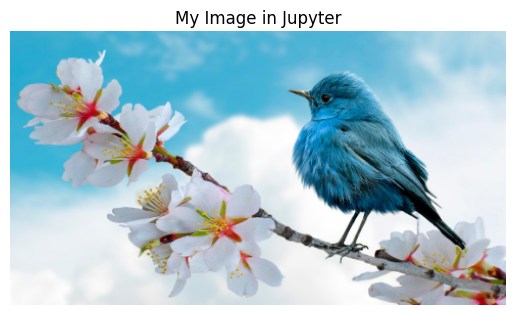

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Read the image
file_path = 'test_pic_bird.png'
image = cv2.imread(file_path)

# Check if image was loaded
if image is None:
    print("Error: Image not found. Check the file path.")
else:
    # OpenCV loads images in BGR format by default.
    # Matplotlib expects RGB. So, we need to convert it.
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(rgb_image)
    plt.title('My Image in Jupyter')
    plt.axis('off')  # Turn off the axis labels
    plt.show()# 这会弹出一个窗口显示图像

In [52]:
#check image shape: pix :H X W x3
rgb_image.shape

(268, 486, 3)

In [ ]:
# cut picture

# cut picture

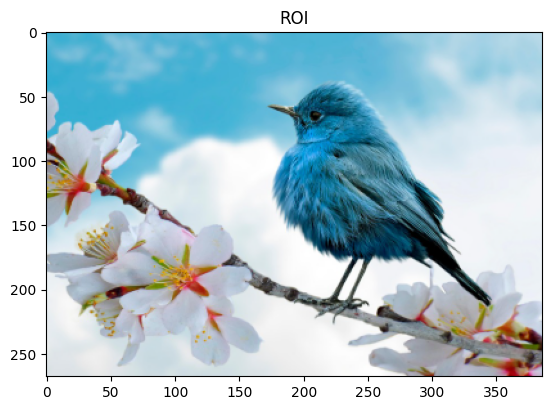

In [82]:

# 检查图片是否成功加载
if image is None:
    print("Error: Image not found.")
else:
    # 定义感兴趣区域 (ROI) 的坐标
    # 格式为 (x_min, y_min, width, height)
    # 请根据您的图片和需求调整这些值
    roi_x, roi_y, roi_width, roi_height = 100, 0, 500, 300

    # 从原始图片中裁剪出 ROI 区域
    roi = rgb_image[roi_y:roi_y + roi_height,roi_x:roi_x + roi_width,0:3] # slicie: reverse dimension direction!!!: h x W X 3 ([r, g, b] value)

    # 展示 ROI 区域
    plt.imshow(roi)
    plt.title('ROI')
    plt.show()


In [ ]:
roi[:,:,2]#

array([[208, 210, 210, ..., 230, 230, 231],
       [209, 211, 210, ..., 230, 230, 230],
       [209, 211, 210, ..., 232, 232, 231],
       ...,
       [252, 251, 250, ..., 219, 222, 221],
       [251, 251, 250, ..., 211, 214, 215],
       [251, 250, 249, ..., 205, 201, 206]], shape=(268, 486), dtype=uint8)

3

# change to grey: 对比度 饱和度

In [ ]:
from PIL import Image, ImageEnhance

def color_processing_demo(image_path, enhance, contrast, ):
    """
    演示如何使用 Pillow 库调整图片的饱和度、对比度和亮度。

    参数:
    image_path (str): 图片文件的路径
    """

    # 2. 调整饱和度
    # ImageEnhance.Color 用于调整饱和度
    # 因子 > 1.0 增加饱和度
    # 因子 < 1.0 减少饱和度
    # 因子 = 1.0 保持不变
    enhancer_color = ImageEnhance.Color(image)
    saturated_image = enhancer_color.enhance(1.8) # 增加饱和度
    saturated_image.show(title="饱和度增加")

    # 3. 调整对比度
    # ImageEnhance.Contrast 用于调整对比度
    # 因子 > 1.0 增加对比度
    # 因子 < 1.0 减少对比度
    enhancer_contrast = ImageEnhance.Contrast(image)
    contrasted_image = enhancer_contrast.enhance(1.5) # 增加对比度
    contrasted_image.show(title="对比度增加")

    # 4. 调整亮度
    # ImageEnhance.Brightness 用于调整亮度
    # 因子 > 1.0 增加亮度
    # 因子 < 1.0 减少亮度
    enhancer_brightness = ImageEnhance.Brightness(image)
    bright_image = enhancer_brightness.enhance(1.2) # 增加亮度
    bright_image.show(title="亮度增加")

    print("所有处理后的图片已显示。")

    except FileNotFoundError:
        print(f"错误: 找不到文件 {image_path}")
    except Exception as e:
        print(f"发生错误: {e}")



In [ ]:
from PIL import Image
import numpy as np

def read_image(image_path):
    image = None
    try:
        image = Image.open(image_path)
        return image
    except Exception as e:
        print(f"发生错误: {e}")
    return image

def adjust_hsv_properties(image_rgb, saturation_factor, brightness_factor):
    """
    通过转换为 HSV 色彩空间来调整图片的饱和度和亮度。
    
    参数:
    image_path (str): 图片文件的路径。
    saturation_factor (float): 饱和度的增强因子。
    brightness_factor (float): 亮度的增强因子。

    返回:
    PIL.Image.Image: 处理后的图片对象。
    """

    # 1. RGB -> HSV
    hsv_image = image_rgb.convert('HSV')
    hsv_array = np.array(hsv_image, dtype=np.float32)

    # 2. 直接修改 S (饱和度) 和 V (亮度) 通道
    # S 通道位于索引 1，V 通道位于索引 2
    hsv_array[:, :, 1] *= saturation_factor
    hsv_array[:, :, 2] *= brightness_factor
    
    # 限制值在 0-255 范围内，防止溢出
    hsv_array = np.clip(hsv_array, 0, 255)

    # 3. HSV -> RGB
    hsv_image_adjusted = Image.fromarray(hsv_array.astype(np.uint8), 'HSV')
    rgb_image_adjusted = hsv_image_adjusted.convert('RGB')
    
    return rgb_image_adjusted

    



In [124]:
import matplotlib.pyplot as plt
import math

def show_pic_simple(images_list, titles_list=None, max_cols=3):
    """
    简洁版函数：在一个网格中显示多张图片。
    
    参数:
    images_list (list): 包含图片对象的列表。
    titles_list (list, optional): 图片标题的列表。
    max_cols (int): 每行最多显示的图片数量。
    """
    image_num = len(images_list)
    if image_num == 0:
        print("图片列表为空，无法显示。")
        return

    # 计算行数和列数
    
    cols = min(image_num, max_cols)
    rows = math.ceil(image_num / cols)


    # 创建子图
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3), squeeze=False)

    # 将二维axes数组展平为一维数组，方便索引
    flat_axes = axes.flatten()

    for i, ax in enumerate(flat_axes):
        if i < image_num:
            ax.imshow(images_list[i])
            if titles_list and i < len(titles_list):
                ax.set_title(titles_list[i])
            else:
                ax.set_title(f'pic {i+1}')
            ax.axis('off')
        else:
            # 隐藏多余的子图
            ax.axis('off')

    plt.tight_layout()
    plt.show()



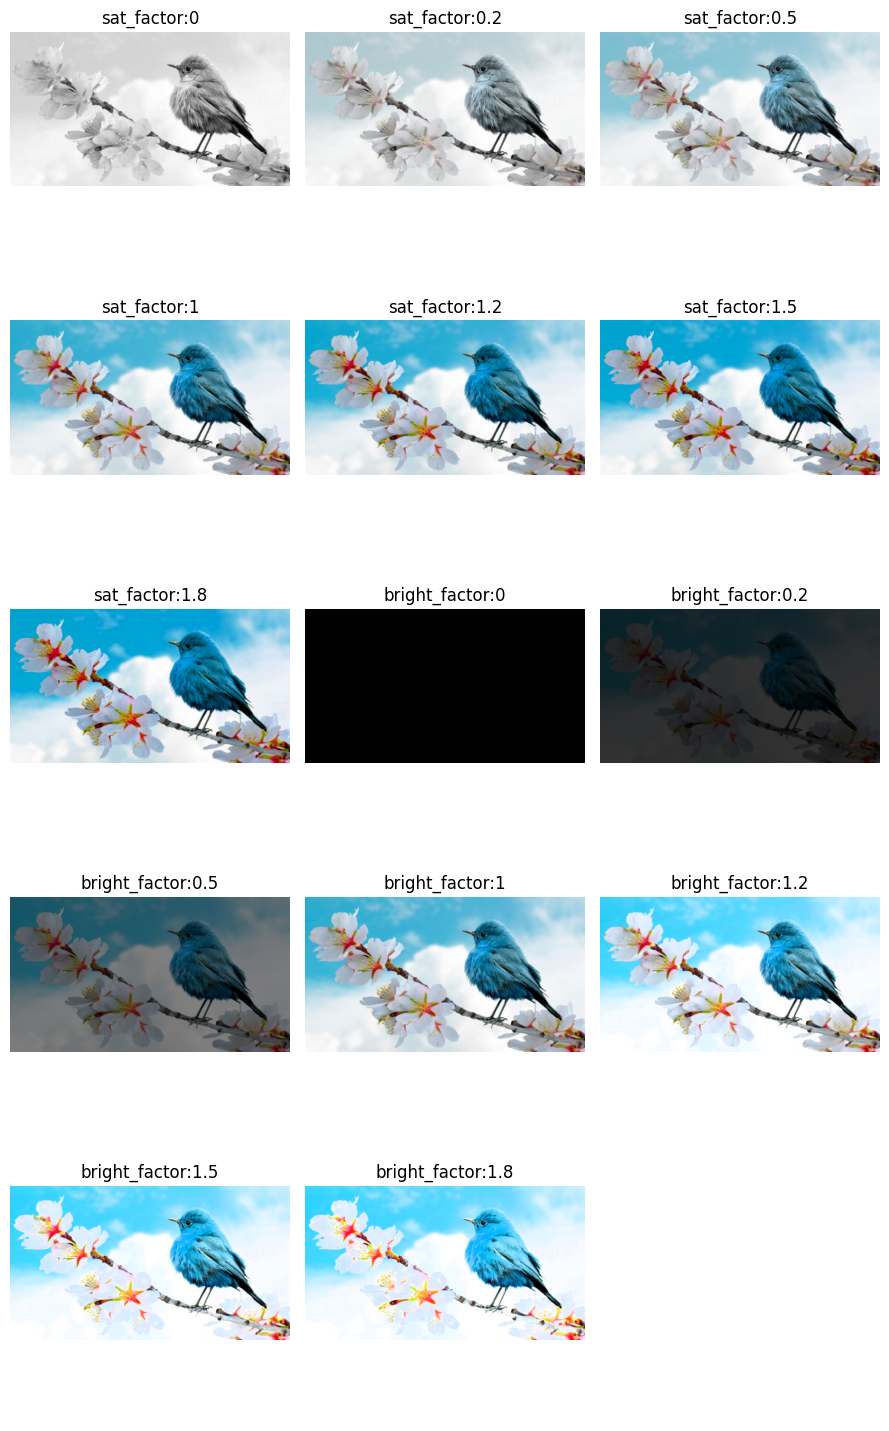

In [125]:
image_file = 'test_pic_bird.png'

image_rgb = read_image(image_file)

# change s:
sat_factor_s = [0,0.2,0.5, 1,1.2,1.5,1.8]
bright_factor = 1
processed_images = []
titles_list = []
for sf in sat_factor_s:
    pic_temp = adjust_hsv_properties(image_rgb, sf, 1)
    processed_images.append(pic_temp)
    titles_list.append(f'sat_factor:{sf}')



#change b
bright_factor_b = [0,0.2,0.5, 1,1.2,1.5,1.8]
for bf in bright_factor_b:
    pic_temp = adjust_hsv_properties(image_rgb, 1, bf)
    processed_images.append(pic_temp)
    titles_list.append(f'bright_factor:{bf}')

# show picture

show_pic_simple(images_list=processed_images, titles_list=titles_list)

In [56]:
roi.shape

(268, 486, 3)

# 对比度： 
对比度调整是一个很常见的图片预处理操作。调整对比度的方法有很多种，主要分为传统方法和深度学习方法。


### 传统方法
这些方法通过数学公式直接对图片的像素值进行操作，通常速度快且易于理解。

线性变换：这是最直接的方法。通过一个简单的线性公式来改变像素值。

公式：新像素值 = α * 旧像素值 + β

α (alpha) 决定了对比度。α > 1 会增加对比度，α < 1 会降低对比度。

β (beta) 决定了亮度。

In [127]:
def image_contrast_tradition(image_rgb, alpha,beta):
    new_image = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)
    return new_image


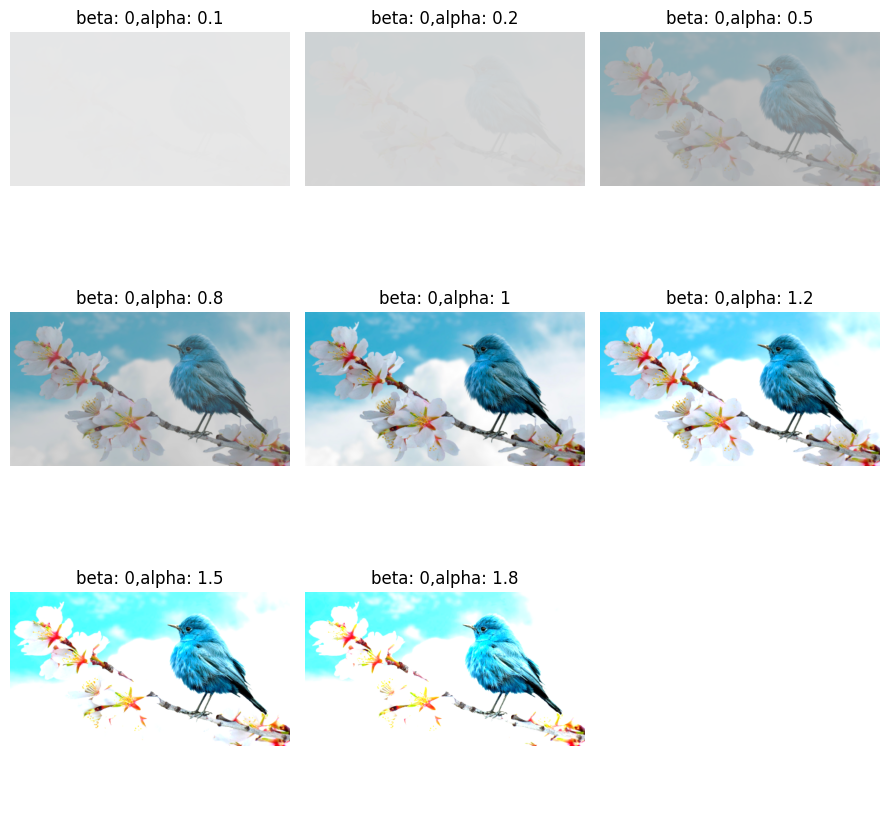

In [142]:
alpha = [0.1, 0.2, 0.5, 0.8,1,1.2, 1.5, 1.8] # 对比度增强
beta = 0    # 亮度不变
numpy_image = np.array(image_rgb)#np.array(image_rgb.convert('RGB'))

processed_images = []
titles_list = []
for a in alpha:
    pic_temp = image_contrast_tradition(numpy_image, a, beta)
    processed_images.append(pic_temp)
    titles_list.append(f'beta: 0,alpha: {a}')


# show picture

show_pic_simple(images_list=processed_images, titles_list=titles_list)


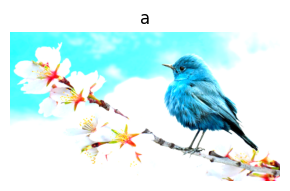

# grey and increase contrast: bright

In [143]:
# 2. 将图片转换为灰度图
# cv2.cvtColor 将 BGR 格式转换为灰度格式
numpy_image = np.array(image_rgb) #np.array(image_rgb.convert('RGB')) # pil read: RGB, cv2 read: BRG
gray_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2GRAY)

# 3. 增强灰度图的对比度
# 我们将使用 CLAHE (自适应直方图均衡化) 来增强对比度
# 这种方法在增强对比度的同时能更好地保留局部细节

# 创建 CLAHE 对象
# clipLimit 限制对比度增强的程度
# tileGridSize 定义了用于均衡化的小块区域大小
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# 应用 CLAHE 到灰度图
enhanced_image1 = clahe.apply(gray_image)

In [146]:
import matplotlib.pyplot as plt
import math

def show_pic_simple_grey(images_list, titles_list=None, max_cols=3,color_show=None):
    """
    简洁版函数：在一个网格中显示多张图片。
    
    参数:
    images_list (list): 包含图片对象的列表。
    titles_list (list, optional): 图片标题的列表。
    max_cols (int): 每行最多显示的图片数量。
    """
    image_num = len(images_list)
    if image_num == 0:
        print("图片列表为空，无法显示。")
        return

    # 计算行数和列数
    
    cols = min(image_num, max_cols)
    rows = math.ceil(image_num / cols)



    # 创建子图
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3), squeeze=False)

    # 将二维axes数组展平为一维数组，方便索引
    flat_axes = axes.flatten()
    
    if not color_show:
        for i, ax in enumerate(flat_axes):
            if i < image_num:
                ax.imshow(images_list[i])
                if titles_list and i < len(titles_list):
                    ax.set_title(titles_list[i])
                else:
                    ax.set_title(f'pic {i+1}')
                ax.axis('off')
            else:
                # 隐藏多余的子图
                ax.axis('off')
    else:
        for i, ax in enumerate(flat_axes):
            if i < image_num:
                if color_show[i]=='grey':
                    ax.imshow(images_list[i], cmap='gray')
                else:
                    ax.imshow(images_list[i])
                if titles_list and i < len(titles_list):
                    ax.set_title(titles_list[i])
                else:
                    ax.set_title(f'pic {i+1}')
                ax.axis('off')
            else:
                # 隐藏多余的子图
                ax.axis('off')


    plt.tight_layout()
    plt.show()



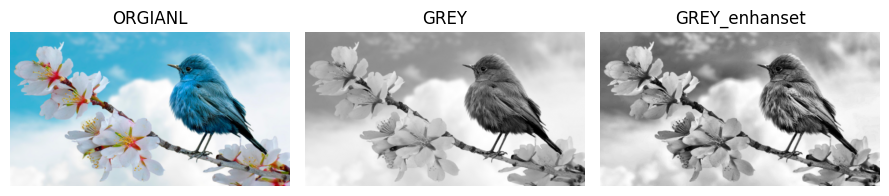

In [149]:
show_pic_simple_grey(images_list=[image_rgb, gray_image,enhanced_image1], titles_list=['ORGIANL','GREY','GREY_enhanset'], color_show = ['color','grey','grey'])

### 深度学习方法
在深度学习中，对比度调整通常被视为数据增强（Data Augmentation）的一部分。在训练模型时，我们不是直接调整对比度，而是随机地调整对比度，让模型学会处理各种不同对比度的图片。

#### 随机对比度调整: 
在训练的每个批次中，对图片施加随机的对比度变化，比如在 [0.8, 1.2] 之间随机选择一个 α 值。这能让模型更加健壮，对光照变化不那么敏感。

#### GANs (生成对抗网络): 
复杂的去模糊、去雾等任务通常会用到 GAN。一个生成器可以学习如何从低对比度图片生成高对比度图片，而一个判别器则会判断生成的图片是否足够真实。这种方法能实现非常精细的对比度调整。

In [27]:
roi.shape

(268, 200, 3)

In [15]:
import numpy as np

In [20]:
a = np.array([[[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]],[[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]])

In [41]:
a = np.array([[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]])

In [32]:
a[:,1:3,:2]
#H, W,

array([[[4, 5]],

       [[4, 5]]])

In [74]:
a.shape

(4, 2, 3)

In [75]:
a

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [81]:
a.reshape(12,2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [1, 2],
       [3, 4],
       [5, 6],
       [1, 2],
       [3, 4],
       [5, 6],
       [1, 2],
       [3, 4],
       [5, 6]])